In [1]:
!pip install seaborn
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_excel('credit card.xlsx')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.shape

(30000, 25)

In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [7]:
df = df.rename(columns={'default.payment.next.month':'payment'})

In [8]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,payment
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
x = df.drop(['ID','payment'],axis=1)

In [10]:
y = df['payment']

In [11]:
y.value_counts()

0    23364
1     6636
Name: payment, dtype: int64

# Extra Tree Classifier

In [12]:
from sklearn.ensemble import ExtraTreesClassifier

In [13]:
extr = ExtraTreesClassifier()

In [14]:
extr.fit(x,y)

ExtraTreesClassifier()

In [15]:
extr.feature_importances_

array([0.06536072, 0.01222739, 0.03333711, 0.02152486, 0.06629732,
       0.10271886, 0.04662819, 0.0322511 , 0.02913414, 0.03005548,
       0.02855471, 0.04960981, 0.04641094, 0.04501981, 0.04445336,
       0.04360467, 0.04458368, 0.04347783, 0.04253189, 0.04239376,
       0.04116333, 0.04236565, 0.04629539])

In [16]:
feature_importance = extr.feature_importances_

In [17]:
imp = pd.DataFrame(feature_importance, columns=['Gain_Score'])

In [18]:
imp.head()

,Gain_Score
0,0.065361
1,0.012227
2,0.033337
3,0.021525
4,0.066297


In [19]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [20]:
cols = pd.DataFrame(x.columns, columns=['Feature Name'])

In [21]:
cols.head()

,Feature Name
0,LIMIT_BAL
1,SEX
2,EDUCATION
3,MARRIAGE
4,AGE


In [22]:
gains = pd.concat([cols,imp],axis=1)

In [23]:
gains.head()

,Feature Name,Gain_Score
0,LIMIT_BAL,0.065361
1,SEX,0.012227
2,EDUCATION,0.033337
3,MARRIAGE,0.021525
4,AGE,0.066297


In [24]:
gains.nlargest(15,'Gain_Score')

,Feature Name,Gain_Score
5,PAY_0,0.102719
4,AGE,0.066297
0,LIMIT_BAL,0.065361
11,BILL_AMT1,0.049610
6,PAY_2,0.046628
12,BILL_AMT2,0.046411
22,PAY_AMT6,0.046295
13,BILL_AMT3,0.045020
16,BILL_AMT6,0.044584
14,BILL_AMT4,0.044453


<AxesSubplot:>

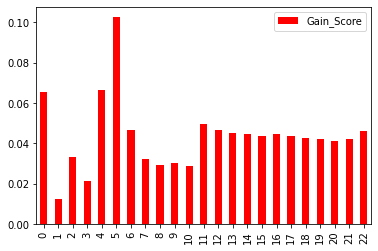

In [27]:
from matplotlib import pyplot as plt
gains.plot(kind='bar',color='red') #horizontal

<AxesSubplot:>

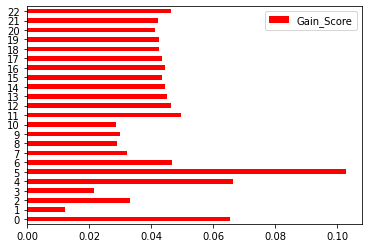

In [28]:
gains.plot(kind='barh',color='red') 

<Figure size 720x432 with 0 Axes>

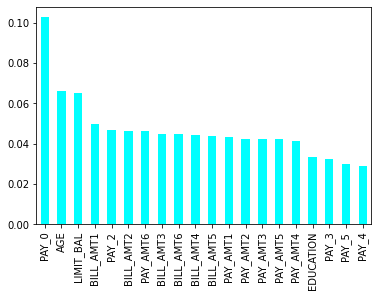

<Figure size 720x432 with 0 Axes>

In [30]:
features = pd.Series(extr.feature_importances_, index=x.columns)
features.nlargest(20).plot(kind='bar', color='cyan')
plt.figure(figsize=(10,6))

# Select K best

In [31]:
df = pd.read_excel('credit card.xlsx')
df = df.rename(columns={'default.payment.next.month':'payment'})
x = df.drop(['ID','payment'],axis=1)
y = df['payment']

In [32]:
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [33]:
from sklearn.feature_selection import SelectKBest, f_classif

In [34]:
model2 = SelectKBest(score_func=f_classif)

In [36]:
feature_score = model2.fit(x,y)

In [38]:
feature_score.scores_

array([7.24068539e+02, 4.79788543e+01, 2.35471118e+01, 1.77812714e+01,
       5.78855582e+00, 3.53771497e+03, 2.23916914e+03, 1.75746644e+03,
       1.47684597e+03, 1.30459118e+03, 1.08540249e+03, 1.15805315e+01,
       6.04423789e+00, 5.94438771e+00, 3.09474518e+00, 1.37108740e+00,
       8.65820292e-01, 1.60403810e+02, 1.03291524e+02, 9.52180109e+01,
       9.71880005e+01, 9.14298008e+01, 8.50890453e+01])

In [39]:
cols = pd.DataFrame(feature_score.scores_, columns=['Feature Score'])

In [40]:
cols

,Feature Score
0,724.068539
1,47.978854
2,23.547112
3,17.781271
4,5.788556
5,3537.714970
6,2239.169136
7,1757.466444
8,1476.845967
9,1304.591176


In [41]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [43]:
col2 = pd.DataFrame(x.columns, columns=['Feature Names'])

In [44]:
col2.head()

,Feature Names
0,LIMIT_BAL
1,SEX
2,EDUCATION
3,MARRIAGE
4,AGE


In [45]:
scores = pd.concat([col2,cols],axis=1)

In [46]:
scores

,Feature Names,Feature Score
0,LIMIT_BAL,724.068539
1,SEX,47.978854
2,EDUCATION,23.547112
3,MARRIAGE,17.781271
4,AGE,5.788556
5,PAY_0,3537.714970
6,PAY_2,2239.169136
7,PAY_3,1757.466444
8,PAY_4,1476.845967
9,PAY_5,1304.591176


In [47]:
newx = scores.nlargest(15,'Feature Score')

In [48]:
newx.head()

,Feature Names,Feature Score
5,PAY_0,3537.714970
6,PAY_2,2239.169136
7,PAY_3,1757.466444
8,PAY_4,1476.845967
9,PAY_5,1304.591176


# PCA

In [49]:
df = pd.read_excel('credit card.xlsx')
df = df.rename(columns={'default.payment.next.month':'payment'})
x = df.drop(['ID','payment'],axis=1)
y = df['payment']

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
mmx = MinMaxScaler()

In [52]:
scaled_x = mmx.fit_transform(x)

In [53]:
scaled_x.shape

(30000, 23)

In [54]:
scaled_x

array([[0.01010101, 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 1.        , 0.33333333, ..., 0.00161031, 0.        ,
        0.00378311],
       [0.08080808, 1.        , 0.33333333, ..., 0.00161031, 0.00234451,
        0.00945777],
       ...,
       [0.02020202, 0.        , 0.33333333, ..., 0.00676329, 0.00468901,
        0.00586382],
       [0.07070707, 0.        , 0.5       , ..., 0.00310145, 0.12417444,
        0.00341236],
       [0.04040404, 0.        , 0.33333333, ..., 0.00161031, 0.00234451,
        0.00189155]])

In [55]:
from sklearn.decomposition import PCA

In [56]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(scaled_x)

In [57]:
x_pca

array([[-0.40423245, -0.00800476, -0.00259672],
       [-0.39188881,  0.209224  , -0.19698759],
       [-0.39264215,  0.08409527, -0.12656657],
       ...,
       [ 0.62351265,  0.33728837, -0.08489178],
       [ 0.60374479, -0.01953155,  0.21421101],
       [ 0.60917214,  0.0099741 ,  0.23321987]])